##  From Given "Iris Dataset, predict the optimum number of clusters and represent it visually.

## GRIP@ The Sparks Foundation ##

### Author - Kedar Joshi

Importing required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

sns.set()

In [5]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [6]:
df = pd.read_csv(r"C:\Users\kedar\OneDrive\Documents\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
species_col = {
    "Iris-setosa" : 0,
    "Iris-versicolor" : 1,
    "Iris-virginica" : 2
}

In [8]:
df['Species'] = df['Species'].map(species_col)

In [9]:
df[:10]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [10]:
X = df.iloc[:, [0, 1, 2, 3]].values

In [11]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\kedar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kedar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kedar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kedar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

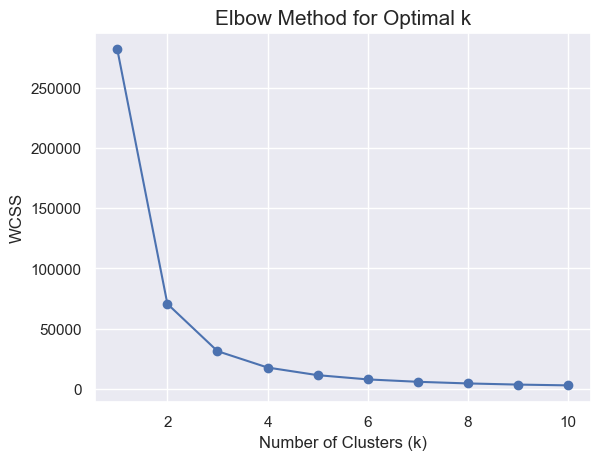

In [12]:
# Plotting the Results onto a line graph
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('Elbow Method for Optimal k', fontsize = 15)
plt.xlabel('Number of Clusters (k)', fontsize = 12)
plt.ylabel('WCSS', fontsize = 12)
plt.show()

In [13]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10)
y_pred = kmeans.fit_predict(X)

C:\Users\kedar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


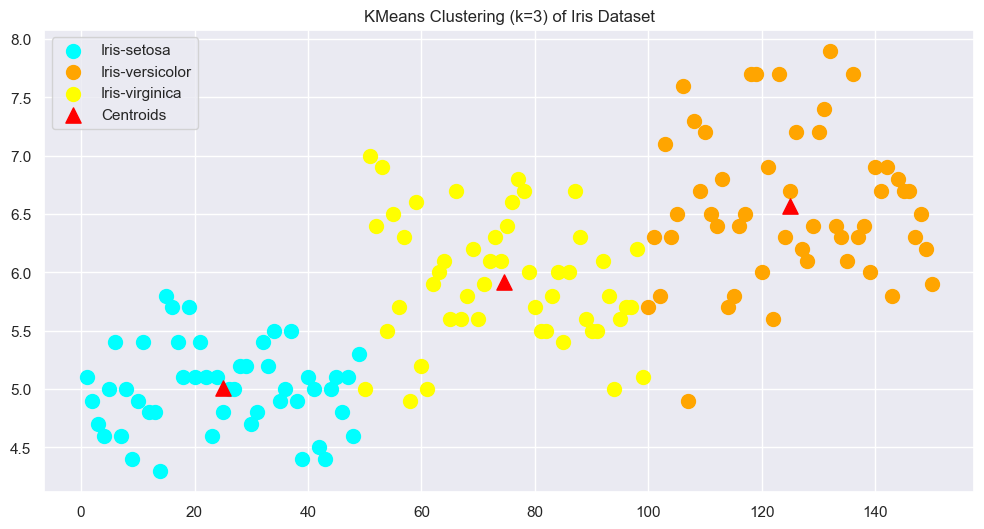

In [15]:
plt.figure(figsize = (12, 6))

plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'cyan', label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolor')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'yellow', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 120, c = 'red', label = 'Centroids', marker = '^')
plt.title('KMeans Clustering (k=3) of Iris Dataset')
plt.legend()
plt.show()